# Latihan 1


In [ ]:
import numpy as np #linier algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sb #untuk statistik visualisasi
%matplotlib inline

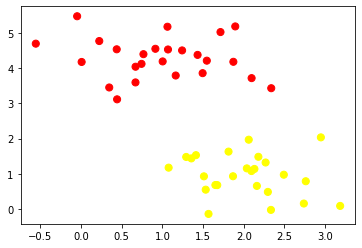

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

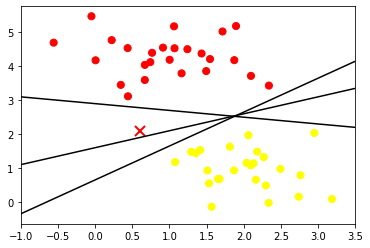

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2,
markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

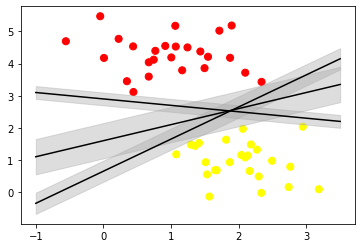

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
 yfit = m * xfit + b 
 plt.plot(xfit, yfit, '-k')
 plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
 color='#AAAAAA', alpha=0.4)

In [ ]:
# pemodelan SVM
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

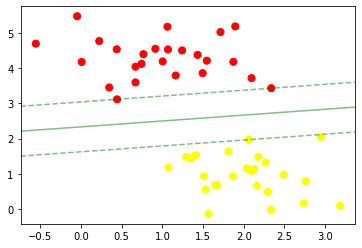

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
 """Plot the decision function for a 2D SVC"""
 if ax is None:
   ax = plt.gca()
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 
 # create grid to evaluate model
 x = np.linspace(xlim[0], xlim[1], 30)
 y = np.linspace(ylim[0], ylim[1], 30)
 Y, X = np.meshgrid(y, x)
 xy = np.vstack([X.ravel(), Y.ravel()]).T 
 P = model.decision_function(xy).reshape(X.shape)

 # plot decision boundary and margins
 ax.contour(X, Y, P, colors='g', 
            levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
 # plot support vectors
 if plot_support:
   ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
              s=300, linewidth=1, facecolors='none');
 ax.set_xlim(xlim)
 ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);



Pada grafik yang menunjukkan bahwa titik berada di lingkaran hitam adalah pivotal element
point atau disebut juga support vector. Kita dapat memeriksanya dengan fungsi berikut 

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

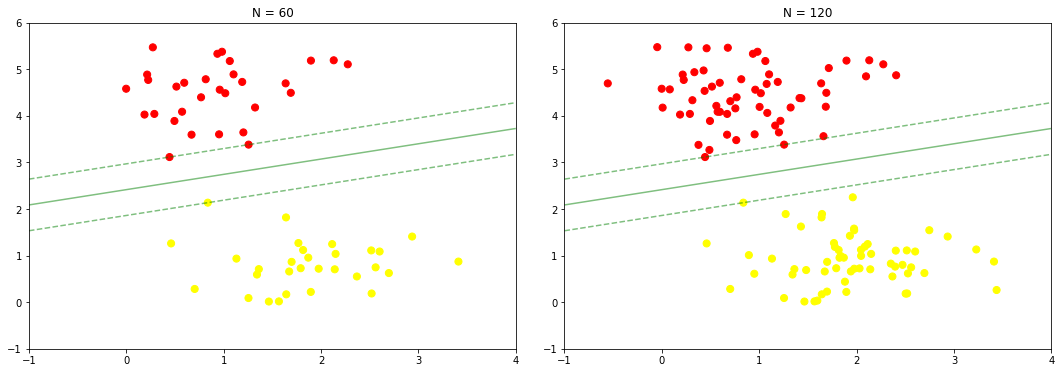

In [ ]:
def plot_svm(N=10, ax=None):
 X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
 X = X[:N]
 y = y[:N]
 model = SVC(kernel='linear', C=1E10)
 model.fit(X, y)
 
 ax = ax or plt.gca()
 ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
 ax.set_xlim(-1, 4)
 ax.set_ylim(-1, 6)
 plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
 plot_svm(N, axi)
 axi.set_title('N = {0}'.format(N))


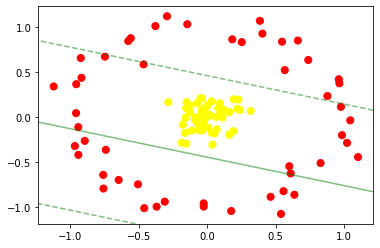

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

cara lain menggunakan rbf (radial basis function)

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

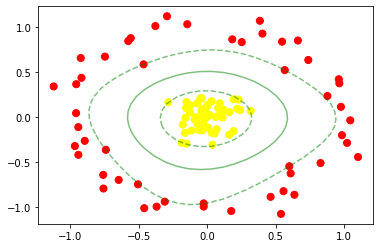

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none');


# Latihan 2

Data yang dikumpulkan dari 
paper tersebut berupa produk review dari platform e-commerce ‘Tokopedia’..Klasifikasi yang 
dilakukan adalah emosi pengguna terhadap produk yang dijual.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sb # for statistical data visualization
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df2= pd.read_csv('/content/gdrive/MyDrive/PRDECT-ID-Dataset1.csv')

In [ ]:
df2.head(10)

,Unnamed: 0,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating,Customer Reviews,Sentiment,Emotion
0,0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G...,North Jakarta,53500,4.9,5449,2369,5,Thank God it's working fine. Safe packaging. ...,Positive,Happy
1,1,Computers and Laptops,WINDOWS 10 PRO AND OFFICE 2019 LICENSE PACK O...,South Tangerang City,72000,4.9,2359,1044,5,"good stuff and fast response, competitive pri...",Positive,Happy
2,2,Computers and Laptops,Midasforce SSD 128 Gb - No Caddy,West Jakarta,213000,5.0,12300,3573,5,"good item, works well, friendly seller, fast ...",Positive,Happy
3,3,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,good as expected the seller is also friendly....,Positive,Happy
4,4,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,"Good stuff, safe packaging, works well",Positive,Happy
5,5,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,"good item, friendly seller..",Positive,Happy
6,6,Computers and Laptops,Macbook Charger Power Plug Head for Indonesian...,South Jakarta,85000,4.9,1339,718,5,good patent joss,Positive,Happy
7,7,Computers and Laptops,AFL Bidirectional HDMI Switcher 1-In 2-Out & ...,West Jakarta,136500,5.0,1201,632,5,"Works fine. Fast response from seller, item w...",Positive,Happy
8,8,Computers and Laptops,AFL Bidirectional HDMI Switcher 1-In 2-Out & ...,West Jakarta,136500,5.0,1201,632,5,good item.. seal.. intact.. original.. functi...,Positive,Happy
9,9,Computers and Laptops,Original Asus Laptop Charger Adapter X441 X44...,West Jakarta,113777,4.9,1630,777,5,Item arrived and works well and looks good wh...,Positive,Happy


In [ ]:
df2.tail(10)

,Unnamed: 0,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating,Customer Reviews,Sentiment,Emotion
5390,5390,Household,Plastic Bubble Wrap - BUBBLEWRAP,North Jakarta,2500,4.8,2872,949,5,"sip, the package arrived safely, hope it work...",Positive,Happy
5391,5391,Household,PRACTICAL RATTRA RAT RATS RAT Clamp RAT MODEL ...,West Jakarta,5900,4.8,1855,201,5,"When tested with a stick, the shots were grea...",Positive,Happy
5392,5392,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,I just took a test to pick up trash in the ri...,Positive,Happy
5393,5393,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,"The goods have arrived and are well received,...",Positive,Happy
5394,5394,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,"appropriate product,, useful for cleaning gar...",Positive,Happy
5395,5395,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,"Competitive prices, items made to order. I add...",Positive,love
5396,5396,Household,Ultrasonic Aroma Diffuser Humidifier Colorful...,North Jakarta,99000,4.9,15529,4074,5,Bought this because my wife and children are ...,Positive,love
5397,5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful...,North Jakarta,99000,4.9,15529,4074,5,"good packaging, the condition of the goods is ...",Positive,Happy
5398,5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful...,North Jakarta,99000,4.9,15529,4074,5,Tiny but works well. And it's cheap and affor...,Positive,Happy
5399,5399,Household,TDS Meter 3 Measuring Instrument Hydroponics ...,North Jakarta,14400,4.9,4765,3044,5,"The product corresponds to the description, s...",Positive,love


In [ ]:
df2 =df2.drop(['Unnamed: 0'], axis=1)

In [ ]:
shape = df2.shape
shape

(5400, 11)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           5400 non-null   object 
 1    Product Name      5400 non-null   object 
 2    Location          5400 non-null   object 
 3    Price             5400 non-null   int64  
 4    Overall Rating    5400 non-null   float64
 5    Number Sold       5400 non-null   int64  
 6    Total Reviews     5400 non-null   int64  
 7    Customer Rating   5400 non-null   int64  
 8    Customer Reviews  5400 non-null   object 
 9    Sentiment         5400 non-null   object 
 10   Emotion           5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


1.  dimensi dataset adalah (5400,12) atau sama, saje dengan jumlah baris dan kolom. jumlah instance 11, variabel 5400  
2.  data terdiri dari 12 kolom, 5400 baris, dengan tipe data float (1), integer(5), object(6)
3.  tidak terdapat data yang null


In [ ]:
emotions = df2.iloc[:,10]. value_counts()
print (emotions)
print(" ")
print(emotions/5400)



 Happy      1770
 Sadness    1202
 Fear        920
 love        809
 Anger       699
Name:  Emotion, dtype: int64
 
 Happy      0.327778
 Sadness    0.222593
 Fear       0.170370
 love       0.149815
 Anger      0.129444
Name:  Emotion, dtype: float64


In [ ]:
sentiment = df2.iloc[:,9]. value_counts()
print(sentiment)
print(" ")
print(sentiment/5400)

 negative    2821
 Positive    2579
Name:  Sentiment, dtype: int64
 
 negative    0.522407
 Positive    0.477593
Name:  Sentiment, dtype: float64


In [ ]:
category = df2.iloc[:, 0]. value_counts()
print(category)
print(" ")
print(category/5400)

 Computers and Laptops       200
 Kitchen                     200
 Health                      200
 Beauty                      200
 Camera                      200
 Mother and Baby             200
 Phones and Tablets          200
 Gaming                      200
 Movies and Music            200
 Women's Fashion             200
 Men's Fashion               200
 Muslim Fashion              200
 Kids and Baby Fashion       200
 Electronics                 200
 Books                       200
 Toys and Hobbies            200
 Sport                       200
 Other Products              200
 Carpentry                   200
 Party Supplies and Craft    200
 Body Care                   200
 Animal Care                 200
 Automotive                  200
 Office & Stationery         200
 Food and Drink              200
 Household                   200
 Tour and Travel              80
 Precious Metal               80
 property                     40
Name: Category, dtype: int64
 
 Computers a

In [ ]:
customer_rating = df2.iloc[:,7]. value_counts()
print(customer_rating)
print(" ")
print(customer_rating/5400)

5    2150
1    1832
2     561
3     462
4     395
Name:  Customer Rating, dtype: int64
 
5    0.398148
1    0.339259
2    0.103889
3    0.085556
4    0.073148
Name:  Customer Rating, dtype: float64


In [ ]:
overal_rating = df2.iloc[:, 4].value_counts()

print(overal_rating)
print(" ")
print(overal_rating / len(df2))

4.9    2625
4.8    1256
5.0     737
4.7     530
4.6     184
4.5      28
4.4      26
4.3       9
4.2       4
4.1       1
Name:  Overall Rating, dtype: int64
 
4.9    0.486111
4.8    0.232593
5.0    0.136481
4.7    0.098148
4.6    0.034074
4.5    0.005185
4.4    0.004815
4.3    0.001667
4.2    0.000741
4.1    0.000185
Name:  Overall Rating, dtype: float64


In [ ]:
df2.describe()

,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000
mean,2.386961e+05,4.854389,15961.951852,2168.645556,3.087037
std,8.016337e+05,0.108259,74201.913338,2915.666035,1.766258
min,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,2.000000e+04,4.800000,1630.000000,576.000000,1.000000
50%,5.990000e+04,4.900000,3794.500000,1192.000000,3.000000
75%,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


In [ ]:
df2.columns.values

array(['Category', ' Product Name', ' Location', ' Price',
       ' Overall Rating', ' Number Sold', ' Total Reviews',
       ' Customer Rating', ' Customer Reviews', ' Sentiment', ' Emotion'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  8.815659677009789
Kurtosis:  103.41795003858174


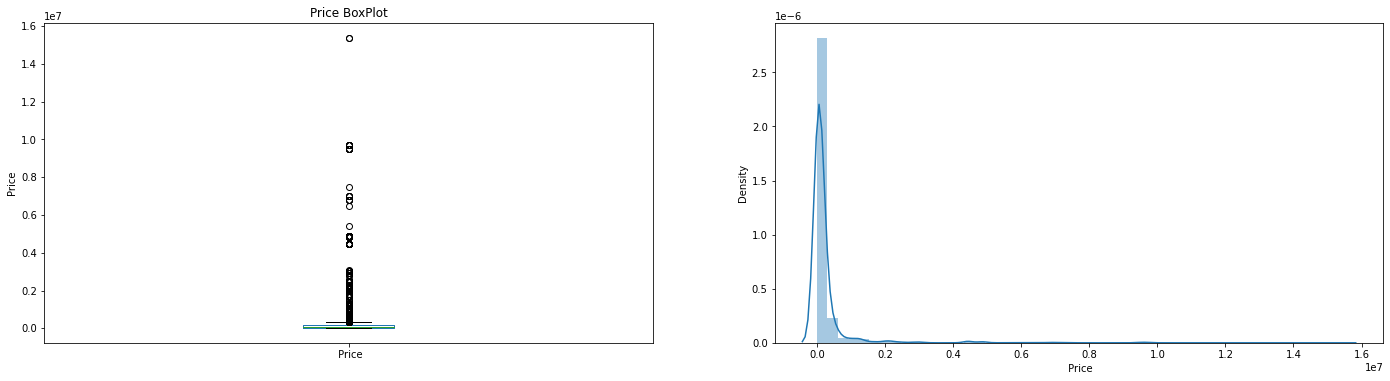

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df2.boxplot(column=' Price', grid = False)
fig.set_title('Price BoxPlot')
fig.set_ylabel('Price')
plt.subplot(3, 2, 2)

sb.distplot(df2[' Price'])
print("Skewness: ", df2[' Price'].skew())
print("Kurtosis: ", df2[' Price'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  -1.3765826860809653
Kurtosis:  3.590036824214169


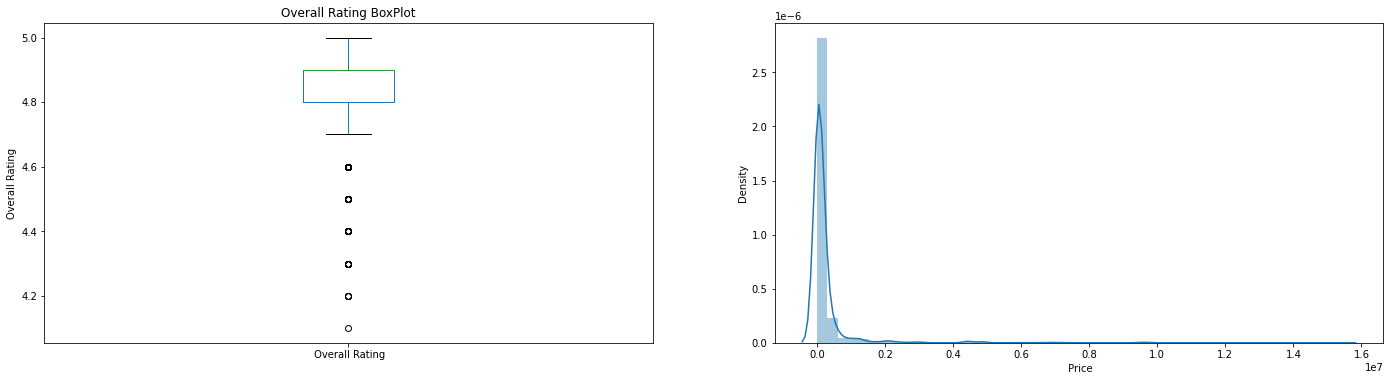

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df2.boxplot(column=' Overall Rating', grid = False)
fig.set_title('Overall Rating BoxPlot')
fig.set_ylabel('Overall Rating')
plt.subplot(3, 2, 2)

sb.distplot(df2[' Price'])
print("Skewness: ", df2[' Overall Rating'].skew())
print("Kurtosis: ", df2[' Overall Rating'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  11.015313494989744
Kurtosis:  130.54308335466735


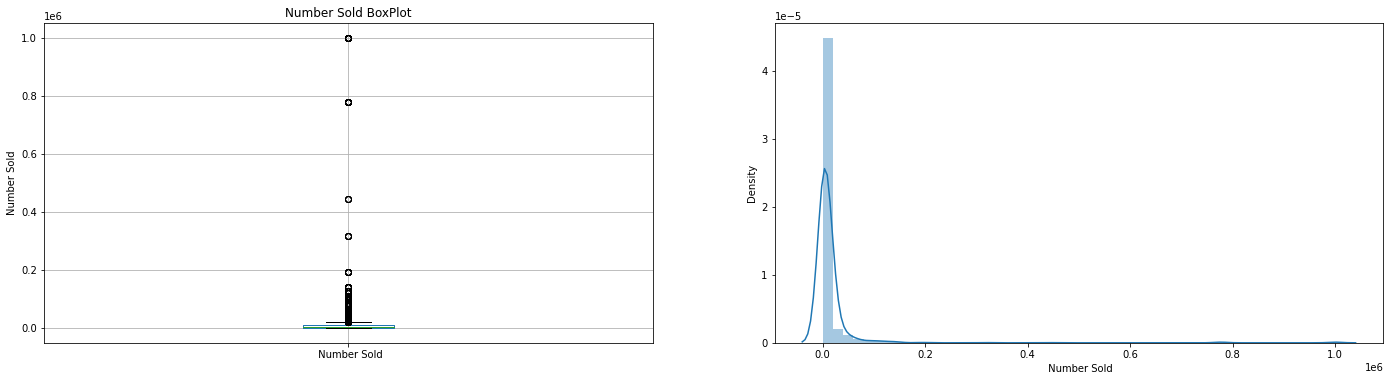

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df2.boxplot(column=' Number Sold', grid = True)
fig.set_title('Number Sold BoxPlot')
fig.set_ylabel('Number Sold')
plt.subplot(3, 2, 2)

sb.distplot(df2[' Number Sold'])
print("Skewness: ", df2[' Number Sold'].skew())
print("Kurtosis: ", df2[' Number Sold'].kurt())

In [ ]:
df2.select_dtypes(include = np.number).columns.to_list()

[' Price',
 ' Overall Rating',
 ' Number Sold',
 ' Total Reviews',
 ' Customer Rating']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  3.7321364896187306
Kurtosis:  18.281855206832407


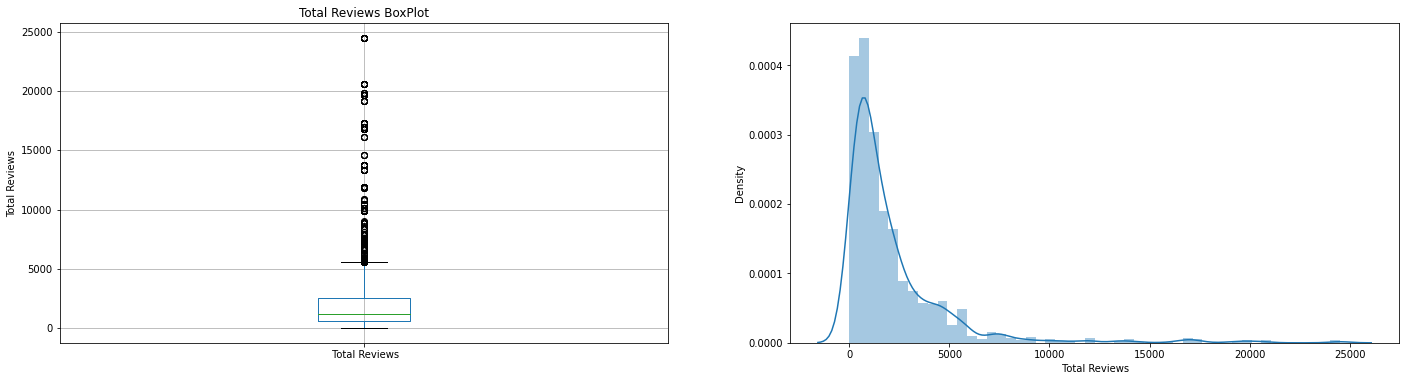

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df2.boxplot(column=' Total Reviews', grid = True)
fig.set_title('Total Reviews BoxPlot')
fig.set_ylabel('Total Reviews')
plt.subplot(3, 2, 2)

sb.distplot(df2[' Total Reviews'])
print("Skewness: ", df2[' Total Reviews'].skew())
print("Kurtosis: ", df2[' Total Reviews'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  -0.06804300858265651
Kurtosis:  -1.7707495893589582


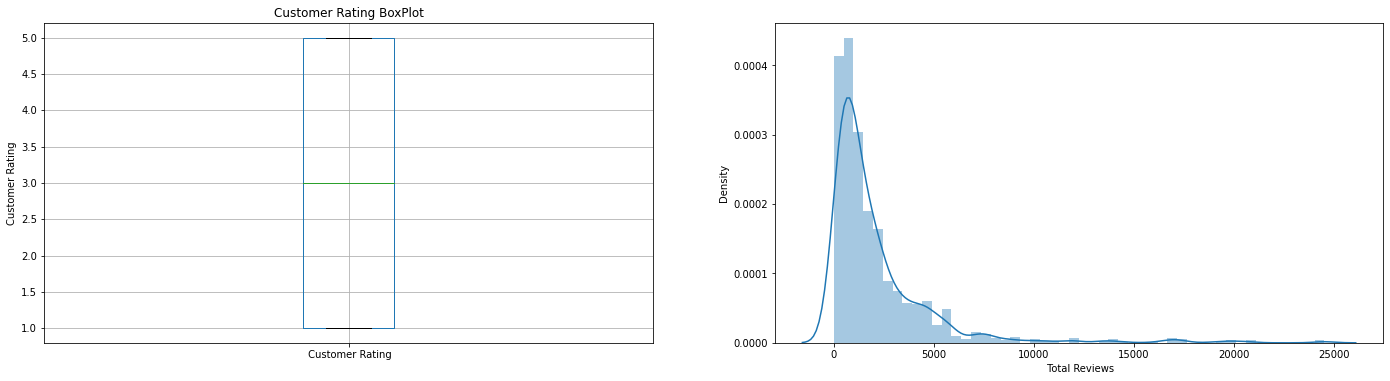

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df2.boxplot(column=' Customer Rating', grid = True)
fig.set_title('Customer Rating BoxPlot')
fig.set_ylabel('Customer Rating')
plt.subplot(3, 2, 2)

sb.distplot(df2[' Total Reviews'])
print("Skewness: ", df2[' Customer Rating'].skew())
print("Kurtosis: ", df2[' Customer Rating'].kurt())

In [ ]:
def distribution_plot(x, y, name):
 sb.barplot(x=x, y=y)
 plt.title(name)
 plt.show()

In [ ]:
dist_x = df2[' Sentiment'].value_counts()
dist_y = df2[' Sentiment'].value_counts()


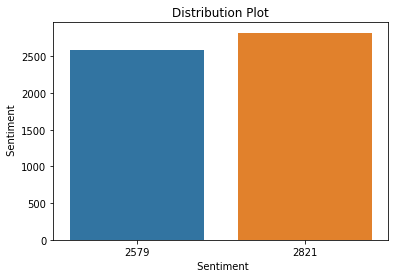

In [ ]:
name = 'Distribution Plot'

distribution_plot(dist_x, dist_y, name)

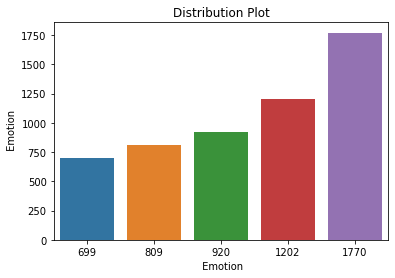

In [ ]:
dist_x = df2[' Emotion'].value_counts()
dist_y = df2[' Emotion'].value_counts()

name = 'Distribution Plot'

distribution_plot(dist_x, dist_y, name)

Skewness:  -1.3765826860809653
Kurtosis:  3.590036824214169


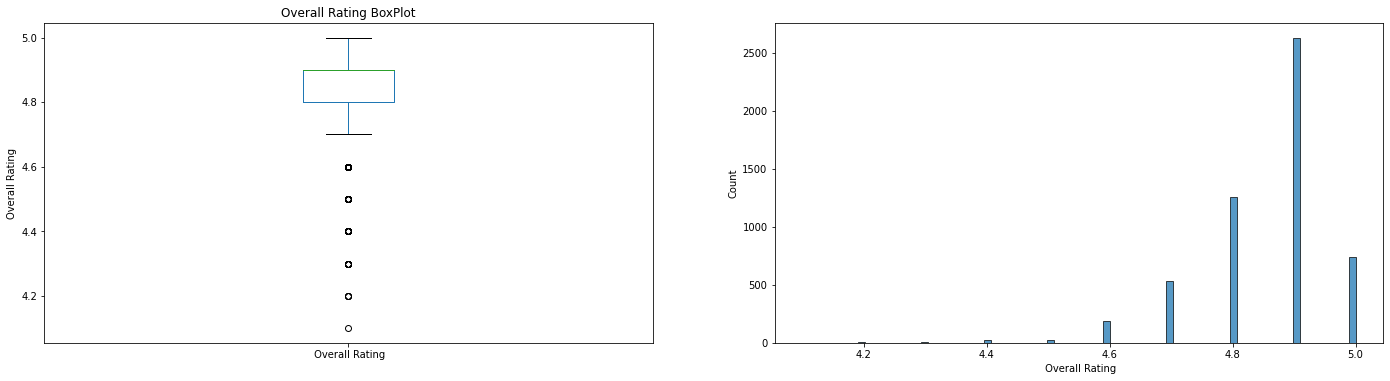

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df2.boxplot(column=' Overall Rating', grid = False)
fig.set_title('Overall Rating BoxPlot')
fig.set_ylabel('Overall Rating')
plt.subplot(3, 2, 2)

sb.histplot(df2[' Overall Rating'])
print("Skewness: ", df2[' Overall Rating'].skew())
print("Kurtosis: ", df2[' Overall Rating'].kurt())

# Modelling Data

In [ ]:
df2.rename( columns = {' Customer Reviews' : 'content'}, inplace = True)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Cleaning the reviews

corpus = []
for i in range(0,5400):
 # Cleaning special character from the reviews
 review = re.sub(pattern='[^a-zA-Z]',repl=' ',
string=df2['content'][i])
 # Converting the entire review into lower case
 review = review.lower()
 # Tokenizing the review by words
 review_words = review.split()
 # Removing the stop words
 review_words = [word for word in review_words if not word in
set(stopwords.words('english'))]
 # Stemming the words
 ps = PorterStemmer()
 review = [ps.stem(word) for word in review_words]
 # Joining the stemmed words
 review = ' '.join(review)
 # Creating a corpus
 corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df2.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [ ]:
y_pred

array([' Happy', ' Fear', ' Sadness', ..., ' Anger', ' Sadness', ' Fear'],
      dtype=object)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred, average = 'micro'))   

Accuracy: 0.5953703703703703
f1_score 0.5953703703703703
